# Polynomial Regression

In [22]:
""" Inspired from the example "Simple tutorial for using TensorFlow to compute polynomial regression.
by Parag K. Mital, Jan. 2016"""
# %% Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


%matplotlib inline  

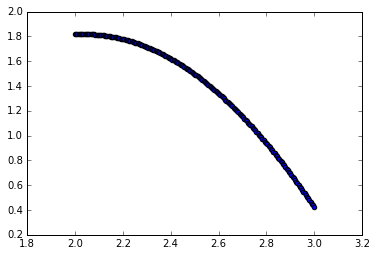

In [46]:
# We will build a polynomial regression using same set
# of data as the previous example. This will enable us to compare results
n_observations = 200
fig, ax = plt.subplots(1, 1)
xs_data = np.linspace(2, 3, n_observations)
ys_data = xs_data* np.sin(xs_data) 
ax.scatter(xs_data, ys_data)
fig.show()
plt.draw()

In [47]:
#train_set
share_ = 100;
xs = xs_data[share_:]
ys = ys_data[share_:]

#val set
valx  = xs_data[:share_]
valy = ys_data[:share_]


In [48]:
xs.shape

(100,)

In [49]:


# %% tf.placeholders for the input and output of the network. We fill the palceholders with 
# our data set  which we need when we compute the graph
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# %% Instead of a single factor and a bias, we'll create a polynomial function
# of different polynomial degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
#try chainging the range here to see how the powers varies
for pow_i in range(1, 6):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % pow_i)
    print (tf.shape(W))
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)
    #print (tf.shape(Y_pred))

# %% Loss function will measure the distance between our observations
# and predictions and average over them.
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)

# %% if we wanted to add regularization, we could add other terms to the cost,
# e.g. ridge regression has a parameter controlling the amount of shrinkage
# over the norm of activations. the larger the shrinkage, the more robust
# to collinearity.
# cost = tf.add(cost, tf.mul(1e-6, tf.global_norm([W])))



Tensor("Shape_30:0", shape=(1,), dtype=int32)
Tensor("Shape_31:0", shape=(1,), dtype=int32)
Tensor("Shape_32:0", shape=(1,), dtype=int32)
Tensor("Shape_33:0", shape=(1,), dtype=int32)
Tensor("Shape_34:0", shape=(1,), dtype=int32)


In [50]:
print (tf.shape(Y_pred))

Tensor("Shape_35:0", shape=(?,), dtype=int32)


In [51]:
# %% Use gradient descent to optimize W,b
# Performs a single step in the negative gradient
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# %% We create a session to use the graph


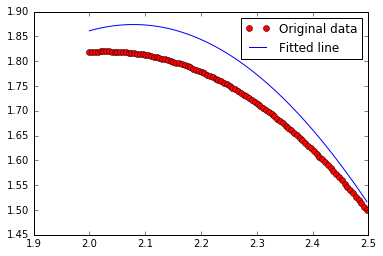

In [52]:
n_epochs = 1000
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        training_cost = sess.run(
            cost, feed_dict={X: xs, Y: ys})
        #print(training_cost)

        if epoch_i % 100 == 0:
            ax.plot(xs, Y_pred.eval(
                feed_dict={X: xs}, session=sess),
                    'k', alpha=epoch_i / n_epochs)
            fig.show()
            plt.draw()

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
        
    plt.plot(valx, valy, 'ro', label='Original data')
    pred = sess.run(Y_pred, feed_dict={X:valx})
    plt.plot(valx, pred , label='Fitted line')
    plt.legend()
    plt.show()
    
    #plt.plot(train_X, train_Y, 'ro', label='Original data')
    #plt.plot(train_X, sess.run(W) * train_X+ sess.run(b), label='Fitted line')
    #plt.legend()
    #plt.show()    
